# TP5

In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
file_path="/content/drive/My Drive/ROB311/"
train_data = np.genfromtxt(file_path+"optdigits.tra", delimiter=',')
test_data=np.genfromtxt(file_path+"optdigits.tes",delimiter=",")

In [3]:
print("train data shape",train_data.shape)
print("test data shape",test_data.shape)

train data shape (3823, 65)
test data shape (1797, 65)


In [4]:
# split the data into the features and attribute
x_train=train_data[:,:-1]
y_train=train_data[:,-1]
x_test=test_data[:,:-1]
y_test=test_data[:,-1]
print("train features: {}, train label: {}".format(x_train.shape,y_train.shape))
print("test features: {}, test label: {}".format(x_test.shape,y_test.shape))

train features: (3823, 64), train label: (3823,)
test features: (1797, 64), test label: (1797,)


In [5]:
# create the pipeline
pca = PCA(n_components=5)
kmeans=KMeans(n_clusters=10)
pipe = Pipeline(steps=[('pca', pca), ('kmeans', kmeans)])

In [6]:
# prediction
pipe.fit(x_train)
y_pred=pipe.predict(x_test)

# project the cluster to labels and evaluate it with classification metric

In [9]:
def get_class_name(nums):
  counts = np.bincount(nums)
  return np.argmax(counts)

In [13]:
# evaluation
# find the projection between predicted attributes and annotations
projected_pred=y_pred.copy()
for i in range(10):
  pred=y_pred[y_test==i]
  c_index=get_class_name(pred)
  projected_pred[y_pred==c_index]=i

In [23]:
metrics.accuracy_score(y_test,projected_pred)

0.6138007790762382

# find the most appropriate parameter

In [24]:
# search and find the most appropriate ncomponents
component_range=[5,15,25,35,45,55,64]
accuracy_score=[]
for c in component_range:
  pca = PCA(n_components=c)
  kmeans=KMeans(n_clusters=10)
  pipe = Pipeline(steps=[('pca', pca), ('kmeans', kmeans)])
  # prediction
  pipe.fit(x_train)
  y_pred=pipe.predict(x_test)
  # evaluation
  # find the projection between predicted attributes and annotations
  projected_pred=y_pred.copy()
  for i in range(10):
    pred=y_pred[y_test==i]
    c_index=get_class_name(pred)
    projected_pred[y_pred==c_index]=i
  accuracy_score.append(metrics.accuracy_score(y_test,projected_pred))

In [25]:
accuracy_score

[0.6093489148580968,
 0.7540345019476906,
 0.76850306065665,
 0.7534780189204229,
 0.7573734001112966,
 0.7779632721202003,
 0.756816917084029]

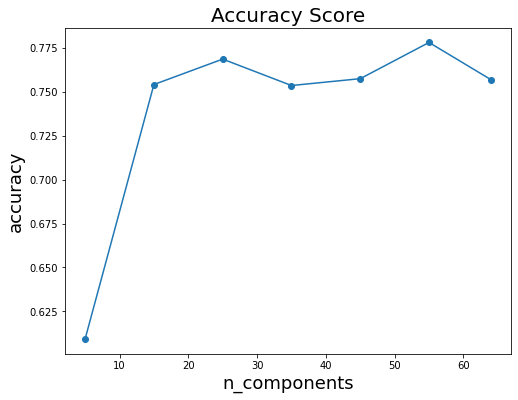

In [33]:
# draw the accuracy score figure
plt.figure(figsize=(8,6))
plt.plot(component_range,accuracy_score,"-o")
plt.ylabel("accuracy",fontsize=18)
plt.xlabel("n_components",fontsize=18)
plt.title("Accuracy Score",fontsize=20)
plt.show()

In [29]:
from sklearn import metrics
print('init\t\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % ("kmeans", kmeans.inertia_,
             metrics.homogeneity_score(y_test, y_pred),
             metrics.completeness_score(y_test, y_pred),
             metrics.v_measure_score(y_test, y_pred),
             metrics.adjusted_rand_score(y_test, y_pred),
             metrics.adjusted_mutual_info_score(y_test,  y_pred),
             metrics.silhouette_score(y_test.reshape(-1,1), y_pred.reshape(-1,1),
                                      metric='euclidean',
                                      sample_size=300)))

init		inertia	homo	compl	v-meas	ARI	AMI	silhouette
kmeans   	2478742	0.738	0.757	0.747	0.659	0.745	0.189


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# visualize the results

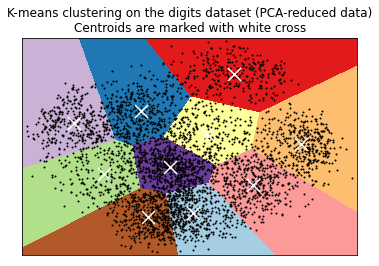

In [35]:
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(x_train) # choose the best params 
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()